In [1]:
import numpy as np
from qlearning import *
import matplotlib.pyplot as plt

# Environment description

In [2]:
class linear_environment: 
    def __init__(self):
        self.n_states = 21         # number of states
        self.n_actions = 2        # number of actions  left/right
        self.reward = np.zeros([self.n_states, self.n_actions])
        self.terminal = np.zeros(self.n_states, dtype=np.int)          # 1 if terminal state, 0 otherwise
        self.next_state = np.stack([np.arange(self.n_states)-1, \
                                    np.arange(self.n_states)+1],1)        # next_state
        self.init_state = 10    # initial state
        self.reward[1,0] = 1    # rewards only at terminal states
        self.reward[-2,1] = 1  
        self.terminal[0] = 1    # only two terminal states
        self.terminal[-1] = 1
        self.next_state[0,0] = 0
        self.next_state[-1,1] = self.n_states-1
        
# an instance of the environment
env = linear_environment()

# Hyperparameters

In [3]:
n_episodes = 1      # number of episodes to run
max_steps = 1000        # max. # of steps to run in each episode
alpha = 0.2          # learning rate
gamma = 0.9          # discount factor

In [4]:
class epsilon_profile: pass
# constant epsilon = 1
epsilon1 = epsilon_profile()
epsilon1.init = 1.    # initial epsilon in e-greedy
epsilon1.final = 1.   # final epsilon in e-greedy
epsilon1.dec_episode = 0  
epsilon1.dec_step = 0.

# linearly decreasing epsilon
epsilon2 = epsilon_profile()
epsilon2.init = 1.    # initial epsilon in e-greedy
epsilon2.final = 0.   # final epsilon in e-greedy
epsilon2.dec_episode = 1. / n_episodes  # amount of decrement in each episode
epsilon2.dec_step = 0.

# Train function for Q table

In [5]:
def train(n_episodes=None, eps=None, plot=False):
    Q, n_steps, sum_rewards = Q_learning_train(env, n_episodes, max_steps,\
                                               alpha, gamma, eps)
    print('Q(s,a)')
    np.set_printoptions(precision=6)
    print(Q)
    if not plot:
        for k in range(n_episodes):
            print('%2d: %.2f steps %2d' % (k, sum_rewards[k],n_steps[k]))
    else:
        fig = plt.figure(num=None, figsize=(6, 4), dpi=130, facecolor='w', \
                                                             edgecolor='k')
        ax2 = fig.add_subplot(111)
        plt.xlabel('Number of episodes')
        plt.ylabel('Number of steps before the termination')
        x = np.linspace(0,len(n_steps),num=len(n_steps))
        plt.plot(x, n_steps, linewidth=1, c='m')
        plt.grid(True)
        plt.show()
    print("train average n_steps = %d" % np.mean(n_steps))
    return Q

# Test function with trained Q table

In [6]:
def test(Q):
    test_n_episodes = 1  # number of episodes to run
    test_max_steps = 1000   # max. # of steps to run in each episode
    test_epsilon = 0.    # test epsilon
    test_n_steps, test_sum_rewards, s, a, sn, r = Q_test(Q, env, test_n_episodes,\
                                                    test_max_steps, test_epsilon)
    print('Test results')
    print("sum_rewards = %d, n_steps = %d"%(test_sum_rewards[0], test_n_steps[0]))

# 1. a) $\epsilon=1$

As can be seen from results below, during testing always $n_{steps} \neq 10$ 

This can be explained by the Q table itself. Since $n_{episodes}=1$ only one end of the linear environment can be reached and hence only one reward could be received during the training while taken action leads to the terminal state. Therefore why only one value in the Q table is updated and the others stay 0. 

That's why during the testing, the walk begins at $s_{init}=10$ and the Q table is 0 in the neighborhood, hence greedy policy w.r.t. Q values is not useful, and turns into a random walk. And in random walk in order to deviate on 10 positions from the beginning state it takes roughly $10^2=100$ steps

In [7]:
print("1a experiment")
for i in range(5):
    Q = train(n_episodes=1, eps=epsilon1)
    test(Q)
    print(" ------------------------ ")

1a experiment
Q(s,a)
[[ 0.   0. ]
 [ 0.2  0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]]
 0: 1.00 steps 16
train average n_steps = 16
Test results
sum_rewards = 1, n_steps = 18
 ------------------------ 
Q(s,a)
[[ 0.   0. ]
 [ 0.2  0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]]
 0: 1.00 steps 108
train average n_steps = 108
Test results
sum_rewards = 1, n_steps = 198
 ------------------------ 
Q(s,a)
[[ 0.   0. ]
 [ 0.2  0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [

# 1. b) $\epsilon=1$

As can be seen from results below, during testing sometimes $n_{steps} = 10$ 

This can be explained by the Q table itself. Since $n_{episodes}=5$ more state-action values can be updated in Q table, also since $\epsilon=1$, the agent always explores and for action selection it never relies on Q values during the training, therefore its just a random walk. Therefore after the first episode, when the pre-terminal state-action value is updated in one of the ends of Q table, that q value is influencing the values in other states of Q table for teh next episodes, as the exploration takes place according to 
$$ Q(s,a) = (1-\alpha)Q(s,a) + \alpha (r + \gamma \text{max}_{a'}Q(s',a') )$$
Depending on whether most of the state-action pairs (to the left or to the right from the initial state) were updated during training or not, Q table is going to be efficient for finding the shortest path or not.

That's why during the testing, the walk begins at $s_{init}=10$ and whenever the Q table wasn't updated in the neighborhood, a number of states to complete the linear environment is not 10. However, whenever the state-action space was explored enough, greedy policy w.r.t. Q values is useful in guiding the agent until the terminal state in 10 steps.

In [8]:
print("1b experiment") 
for i in range(5):
    Q = train(n_episodes=5, eps=epsilon1)
    test(Q)
    print(" ------------------------ ")

1b experiment
Q(s,a)
[[  0.000000e+00   0.000000e+00]
 [  0.000000e+00   0.000000e+00]
 [  0.000000e+00   0.000000e+00]
 [  0.000000e+00   7.278008e-09]
 [  5.038621e-10   4.789800e-08]
 [  8.273291e-09   1.997478e-07]
 [  5.674496e-08   6.506374e-07]
 [  1.247944e-07   4.799784e-06]
 [  2.666547e-07   2.995170e-05]
 [  6.695995e-06   1.022877e-04]
 [  2.755139e-05   2.691710e-04]
 [  9.796664e-05   1.153201e-03]
 [  2.147551e-04   1.557015e-02]
 [  3.712011e-03   4.597552e-02]
 [  1.100835e-02   1.261459e-01]
 [  8.876832e-02   1.723584e-01]
 [  1.412041e-01   2.118302e-01]
 [  1.469879e-01   3.265828e-01]
 [  2.376583e-01   4.352691e-01]
 [  2.508740e-01   6.723200e-01]
 [  0.000000e+00   0.000000e+00]]
 0: 1.00 steps 20
 1: 1.00 steps 48
 2: 1.00 steps 72
 3: 1.00 steps 346
 4: 1.00 steps 114
train average n_steps = 120
Test results
sum_rewards = 1, n_steps = 10
 ------------------------ 
Q(s,a)
[[  0.000000e+00   0.000000e+00]
 [  4.880000e-01   0.000000e+00]
 [  9.360000e-02   0.0

# 1. c) $\epsilon=1$

This can be explained by the Q table. Since $n_{episodes}=1000$ all state-action values get updates in Q table, it is due to $\epsilon=1$ which turns the walk into a random walk, sinse the agent always explores and for action selection, it never relies on Q values during the training. Since it is a random walk during training, in order to deviate on 10 positions from the beginning state it takes roughly $10^2=100$ steps, which is confirmed empirically.

That's why during the testing, the greedy policy w.r.t. Q values is useful in guiding the agent until the terminal state in shortest way of $n_{steps} = 10$ .

Q(s,a)
[[ 0.        0.      ]
 [ 1.        0.81    ]
 [ 0.9       0.729   ]
 [ 0.81      0.6561  ]
 [ 0.729     0.59049 ]
 [ 0.6561    0.531441]
 [ 0.59049   0.478297]
 [ 0.531441  0.430467]
 [ 0.478297  0.38742 ]
 [ 0.430467  0.348678]
 [ 0.38742   0.38742 ]
 [ 0.348678  0.430467]
 [ 0.38742   0.478297]
 [ 0.430467  0.531441]
 [ 0.478297  0.59049 ]
 [ 0.531441  0.6561  ]
 [ 0.59049   0.729   ]
 [ 0.6561    0.81    ]
 [ 0.729     0.9     ]
 [ 0.81      1.      ]
 [ 0.        0.      ]]


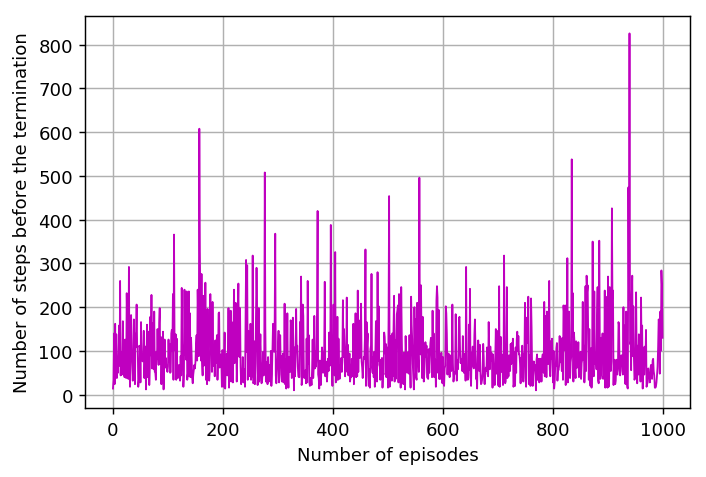

train average n_steps = 97


Test results
sum_rewards = 1, n_steps = 10


















In [9]:
Q = train(n_episodes=1000, eps=epsilon1, plot=True)
print('\n')
test(Q)
for i in range(8):
    print('\n')

# 2. a) $\epsilon = 1, \quad \epsilon \rightarrow 0$

As can be seen from results below, during testing $n_{steps} = 10$ 

Also we can see that in this case due to exploration that is linearly replaced by exploitation only a half of Q table is updated fully since in the beginning the agent explores random state-action pairs (in the random walk setting) but with time as $\epsilon \rightarrow 0$ it starts to rely on Q function values and act greedy on them. That's why Q table is sparse, but it is enough for converging to the optimal value of steps at the end of training.

Q(s,a)
[[ 0.        0.      ]
 [ 0.488     0.      ]
 [ 0.0936    0.      ]
 [ 0.00648   0.      ]
 [ 0.        0.      ]
 [ 0.        0.      ]
 [ 0.        0.      ]
 [ 0.        0.      ]
 [ 0.        0.      ]
 [ 0.        0.      ]
 [ 0.        0.38607 ]
 [ 0.        0.4299  ]
 [ 0.        0.478087]
 [ 0.        0.531373]
 [ 0.        0.590471]
 [ 0.        0.656096]
 [ 0.        0.728999]
 [ 0.        0.81    ]
 [ 0.        0.9     ]
 [ 0.        1.      ]
 [ 0.        0.      ]]


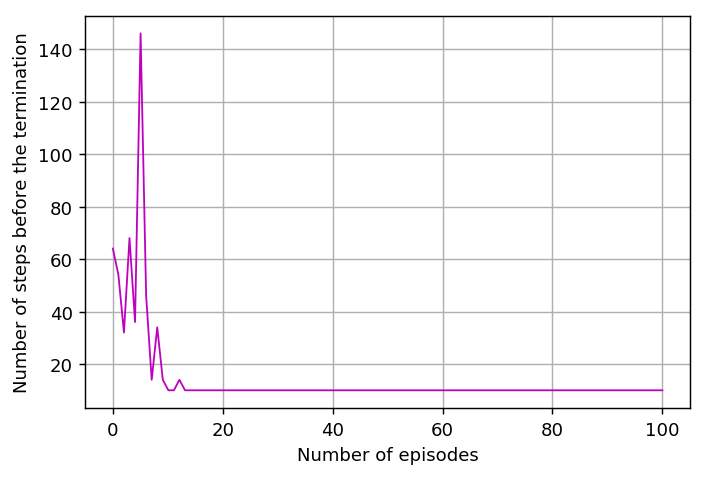

train average n_steps = 14


Test results
sum_rewards = 1, n_steps = 10


In [10]:
Q = train(n_episodes=100, eps=epsilon2, plot=True)
print('\n')
test(Q)